In [1]:
from prep import create_weather  # Prep data if it doesn't exist
create_weather()

In [2]:
import h5py
from glob import glob
import os
import dask.array as da

filenames = sorted(glob(os.path.join('../data', 'weather-big', '*.hdf5')))
dsets = [h5py.File(filename, mode='r')['/t2m'] for filename in filenames]
arrs = [da.from_array(dset, chunks=(500, 500)) for dset in dsets]
dsets[0]
x = da.stack(arrs, axis=0)
average = x.mean(axis=0)

In [3]:
dsets[0][:5, :5] 

array([[81, 81, 81, 81, 81],
       [81, 81, 81, 81, 81],
       [81, 81, 81, 81, 81],
       [81, 81, 81, 81, 81],
       [81, 81, 81, 81, 81]], dtype=uint8)

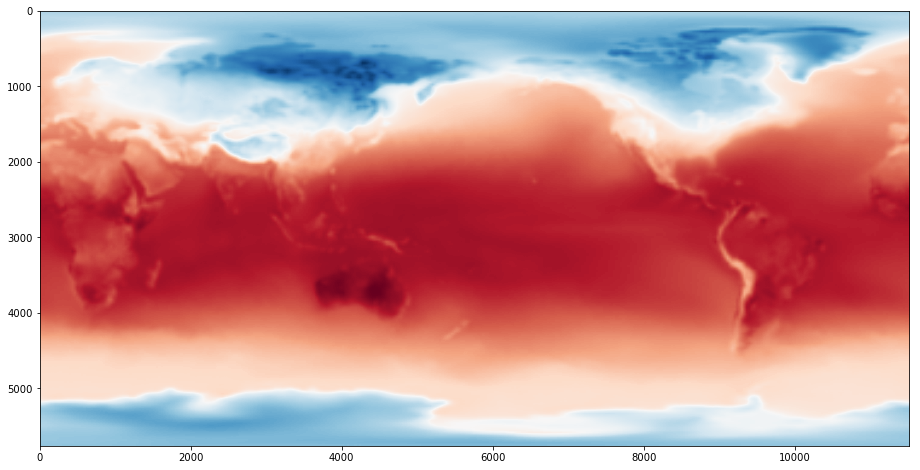

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))
plt.imshow(average, cmap='RdBu_r')

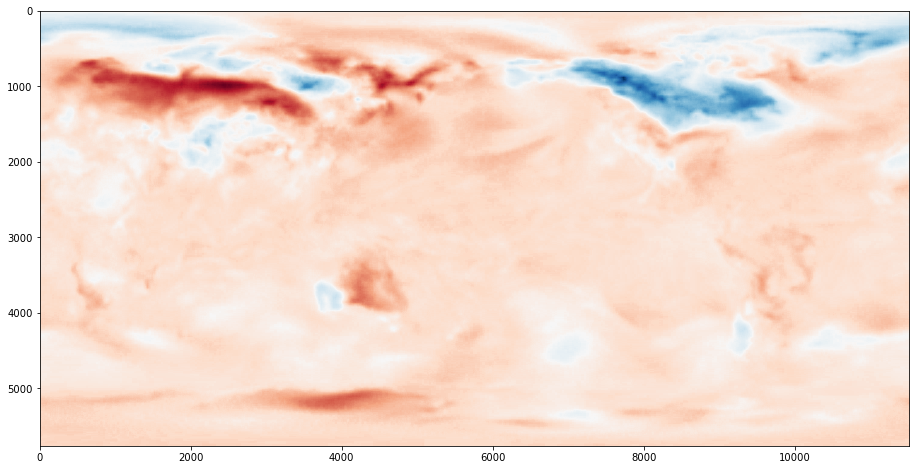

In [5]:
result = x[0] - x.mean(axis=0)
fig = plt.figure(figsize=(16, 8))
plt.imshow(result, cmap='RdBu_r')